In [51]:
from pyspark.sql.functions import randn, rand, sum, col, round, lit
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import numpy as np
import time
import pandas as pd
import datetime 
print(datetime.datetime.now())
import matplotlib.pyplot as plt

sc = SparkContext('local')
spark = SparkSession(sc)

2019-05-29 19:44:22.511986


### Import Data

In [33]:
# BK = spark.read.csv('data/18v1/BK_18v1.csv', header=True)
# BX = spark.read.csv('data/18v1/BX_18v1.csv', header=True)
# MN = spark.read.csv('data/18v1/MN_18v1.csv', header=True)
# QN = spark.read.csv('data/18v1/QN_18v1.csv', header=True)
# SI = spark.read.csv('data/18v1/SI_18v1.csv', header=True)

df19v1 = spark.read.csv('../data/pluto.csv', header=True)
df18v2_1 = spark.read.csv('../data/pluto_18v2_1.csv', header=True)
df18v1 = spark.read.csv('../data/pluto_18v1.csv', header=True)

### convert column names all to lower case

In [34]:
df18v1 = df18v1.select([col(A).alias(A.lower()) for A in df18v1.schema.names])
df18v2_1 = df18v2_1.select([col(A).alias(A.lower()) for A in df18v2_1.schema.names])
df19v1 = df19v1.select([col(A).alias(A.lower()) for A in df19v1.schema.names])

In [35]:
cols = df18v1.columns

In [59]:
df18v1 = df18v1.select(cols)
df18v2_1 = df18v2_1.select(cols)
df19v1 = df19v1.select(cols)
df19v1 = df19v1.drop(df19v1.version).withColumn('version', lit('19v1'))
df18v1 = df18v1.drop(df18v1.version).withColumn('version', lit('18v1'))
df18v2_1 = df18v2_1.drop(df18v2_1.version).withColumn('version', lit('18v2_1'))

In [60]:
df =df19v1.union(df18v2_1).union(df18v1)

In [61]:
start_time = time.time()
summary = df.groupBy("version").agg(sum("unitsres"),
                                    sum("lotarea"),
                                    sum("bldgarea"),
                                    sum("comarea"),
                                    sum("resarea"),
                                    sum("officearea"),
                                    sum("retailarea"),
                                    sum("garagearea"),
                                    sum("strgearea"),
                                    sum("factryarea"),
                                    sum("otherarea"),
                                    sum("assessland"),
                                    sum("assesstot"),
                                    sum("exemptland"),
                                    sum("exempttot"),
                                    sum("firm07_flag"),
                                    sum("pfirm15_flag")).toPandas()
elapsed_time = time.time() - start_time

In [62]:
elapsed_time

64.2947039604187

In [63]:
agg_cols = ['version','UnitsRes','LotArea','BldgArea','ComArea',
 'ResArea','OfficeArea','RetailArea','GarageArea',
 'StrgeArea','FactryArea','OtherArea','AssessLand',
 'AssessTot','ExemptLand','ExemptTot','FIRM07_FLAG',
 'PFIRM15_FLAG']

In [64]:
summary.columns = agg_cols

In [65]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
0,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
1,18v2_1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
2,19v1,3592850.0,6.644755e+09,5.500165e+09,1.785941e+09,3.423055e+09,655012244.0,277379649.0,122290087.0,98419462.0,98968552.0,529918804.0,1.063634e+11,4.307480e+11,1.341270e+06,1.446244e+11,34972.0,65681.0


In [66]:
summary.to_csv('aggregate_value.csv')

In [67]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
0,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
1,18v2_1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
2,19v1,3592850.0,6.644755e+09,5.500165e+09,1.785941e+09,3.423055e+09,655012244.0,277379649.0,122290087.0,98419462.0,98968552.0,529918804.0,1.063634e+11,4.307480e+11,1.341270e+06,1.446244e+11,34972.0,65681.0


In [68]:
summary.index = summary.version
# summary = summary.reindex(['18v1', '18V2_1', '19v1'])

In [69]:
summary

,version,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
version,,,,,,,,,,,,,,,,,,
18v1,18v1,3555871.0,6.815806e+09,5.484765e+09,1.816284e+09,3.470204e+09,652968426.0,276388698.0,122406091.0,102263027.0,116348116.0,524094223.0,9.779918e+10,3.955918e+11,4.414227e+10,1.422077e+11,34562.0,65618.0
18v2_1,18v2_1,3572157.0,6.813542e+09,5.504286e+09,1.820455e+09,3.477582e+09,654410227.0,276896354.0,120942956.0,100257225.0,116612843.0,524200834.0,9.782664e+10,3.936520e+11,4.456274e+10,1.446245e+11,34683.0,65688.0
19v1,19v1,3592850.0,6.644755e+09,5.500165e+09,1.785941e+09,3.423055e+09,655012244.0,277379649.0,122290087.0,98419462.0,98968552.0,529918804.0,1.063634e+11,4.307480e+11,1.341270e+06,1.446244e+11,34972.0,65681.0


In [70]:
summary_pct = summary.iloc[:, 1:].pct_change()

In [71]:
summary_pct

,UnitsRes,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AssessLand,AssessTot,ExemptLand,ExemptTot,FIRM07_FLAG,PFIRM15_FLAG
version,,,,,,,,,,,,,,,,,
18v1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18v2_1,0.004580,-0.000332,0.003559,0.002297,0.002126,0.002208,0.001837,-0.011953,-0.019614,0.002275,0.000203,0.000281,-0.004904,0.009525,1.699452e-02,0.003501,0.001067
19v1,0.005793,-0.024772,-0.000749,-0.018959,-0.015680,0.000920,0.001745,0.011139,-0.018330,-0.151307,0.010908,0.087264,0.094236,-0.999970,-3.532252e-07,0.008333,-0.000107


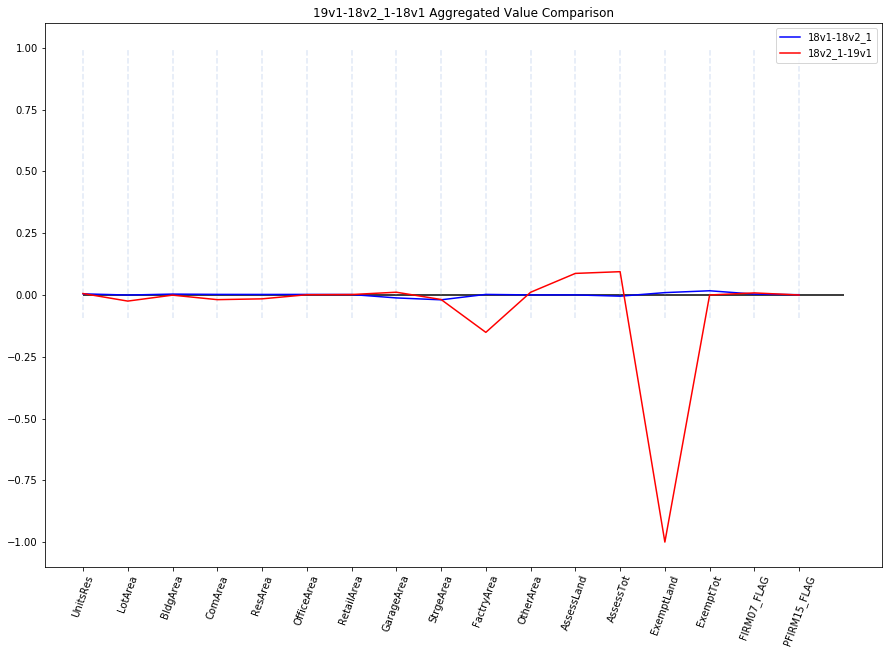

In [73]:
plt.figure(figsize=(15, 10))
plt.plot(range(17), summary_pct.iloc[1, :], color = 'blue', label='18v1-18v2_1')
plt.plot(range(17), summary_pct.iloc[2, :], color = 'red', label='18v2_1-19v1')
plt.hlines(0, 0, 17, color = 'black')
for i in range(17):
    plt.vlines(i, min(-summary_pct.iloc[2, :]), max(-summary_pct.iloc[2, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(17), summary_pct.columns, rotation=70)
plt.title('19v1-18v2_1-18v1 Aggregated Value Comparison')
plt.legend()
plt.savefig('19v1-18v2_1-18v1_Aggregated_Value_Comparison.png', bbox_inches='tight')
plt.show()

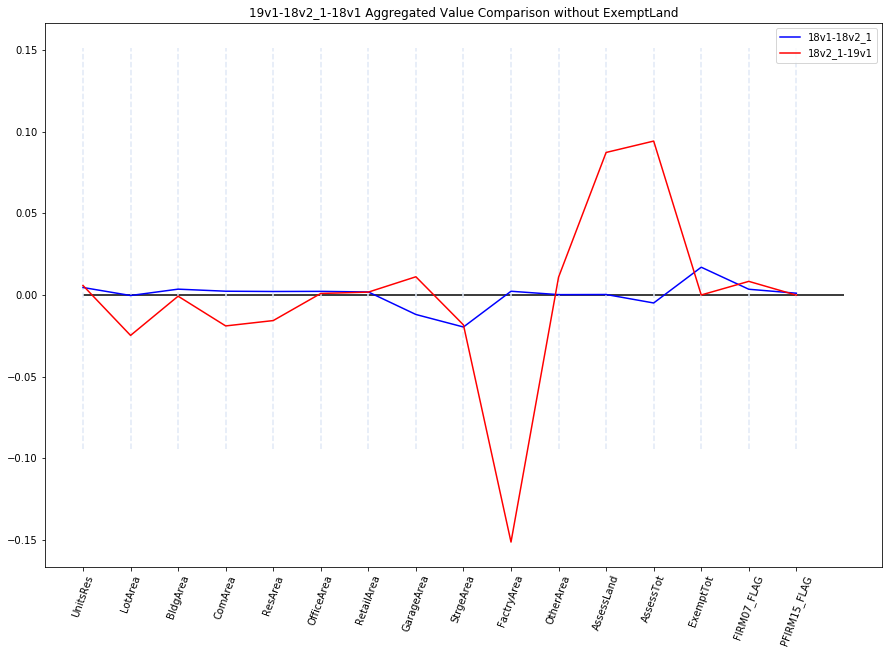

In [87]:
plt.figure(figsize=(15, 10))
summary_pct = summary_pct.drop(['ExemptLand'], axis=1)
plt.plot(range(16), summary_pct.iloc[1, :], color = 'blue', label='18v1-18v2_1')
plt.plot(range(16), summary_pct.iloc[2, :], color = 'red', label='18v2_1-19v1')
plt.hlines(0, 0, 16, color = 'black')
for i in range(16):
    plt.vlines(i, min(-summary_pct.iloc[2, :]), max(-summary_pct.iloc[2, :]), color = '#e1e9f7', linestyles='dashed')
plt.xticks(range(16), summary_pct.columns, rotation=70)
plt.title('19v1-18v2_1-18v1 Aggregated Value Comparison without ExemptLand')
plt.legend()
plt.savefig('19v1-18v2_1-18v1_Aggregated_Value_Comparison_wo_ExemptLand.png', bbox_inches='tight')
plt.show()